In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import seaborn as sns

Load edeck files (organized by year, and by basin)

In [2]:
year_sel = 2021
etracks_dir = 'VALIDATION_data/edecks/{year_sel}/'.format(year_sel=year_sel)
fnames_all = [os.path.join(etracks_dir, f) for f in os.listdir(etracks_dir) if f.endswith('.dat')]

In [3]:
fnames_all

['VALIDATION_data/edecks/2021/eal082021.dat',
 'VALIDATION_data/edecks/2021/eal992021.dat',
 'VALIDATION_data/edecks/2021/eep012021.dat',
 'VALIDATION_data/edecks/2021/eep922021.dat',
 'VALIDATION_data/edecks/2021/eep032021.dat',
 'VALIDATION_data/edecks/2021/eal152021.dat',
 'VALIDATION_data/edecks/2021/eep992021.dat',
 'VALIDATION_data/edecks/2021/eep132021.dat',
 'VALIDATION_data/edecks/2021/eep062021.dat',
 'VALIDATION_data/edecks/2021/eep942021.dat',
 'VALIDATION_data/edecks/2021/eep912021.dat',
 'VALIDATION_data/edecks/2021/eep122021.dat',
 'VALIDATION_data/edecks/2021/ecp912021.dat',
 'VALIDATION_data/edecks/2021/eal162021.dat',
 'VALIDATION_data/edecks/2021/eal142021.dat',
 'VALIDATION_data/edecks/2021/eep092021.dat',
 'VALIDATION_data/edecks/2021/eep142021.dat',
 'VALIDATION_data/edecks/2021/eal982021.dat',
 'VALIDATION_data/edecks/2021/eal112021.dat',
 'VALIDATION_data/edecks/2021/eep902021.dat',
 'VALIDATION_data/edecks/2021/eep022021.dat',
 'VALIDATION_data/edecks/2021/eal1

#### General Format of Files
BASIN  CYCLONE NUMBER  DATE (YYYYMMDDHH)   ProbFormat   Tech   TAU    LAT N/S    Lon E/W    PROB

ProbFormat: 
* TR: track
* IN: intensity
* RI: rapid intensification
* RW: rapid weakening
* WR: wind radii
* PR: pressure
* GN: TC genesis probability
* GS: TC genesis shape
* ER: eyewall replacement

Tech: objective technique

TAU: forecast period (0-168 hrs)

Lat N/S: 0-900 [tenths of degrees]

Lon E/W: 0-1800 [tenths of degrees]

Prob:  probability of ProbItem, 0-100%

##### Intensity Probability
* ProbItem: Wind speed (bias adjusted), 0-300 kts
* TY:  level of TC development; currently unused
* Half_Range: Half the probability range (radius), 0-50 kts

###### Rapid Intensification Probability / Rapid Weakening Probability
* ProbItem: Intensity change, 0-300 kts
* V: final intensity, 0-300 kts
* Initials: forecaster initials
* RIstartTAU: RI start time, 0-168 hours
* RIstopTAU: RI stop time, 0-168 hrs

Create empty dataframes so we can reformat and save data as csv file

In [5]:
#
IN_valid_names = {'BASIN':[],'CYCLONE NO':[],'DATE':[],'ProbFormat':[],
                'Tech':[],'TAU':[],'LAT':[],'LON':[],'ProbItem':[],'TY':[],
                            'foo':[],'HalfRange':[]}
RI_valid_names = {'BASIN':[],'CYCLONE NO':[],'DATE':[],'ProbFormat':[],
                'Tech':[],'TAU':[],'LAT':[],'LON':[],'ProbItem':[],'Intensity Change':[],
                            'V':[],'Initials':[],'RIstartTAU':[],'RIstopTAU':[]}
etracks_valid_RI = pd.DataFrame.from_dict(RI_valid_names,orient='columns')
etracks_valid_IN = pd.DataFrame.from_dict(IN_valid_names,orient='columns')
etracks_valid_RW = pd.DataFrame.from_dict(RI_valid_names,orient='columns')


In [7]:
#for i in np.arange(0,len(fnames_all)):
i = 30
fname = fnames_all[i]
#i_basin = BASIN[i]
fname_full = open(fname)
lines = fname_full.readlines()

for iline in np.arange(0,len(lines)):
    #iline = 37
    line_sel = lines[iline].split()
    i_pf = line_sel[3]
    #print(i_pf)
    if i_pf == 'RI,':
        #print('RI!')
        etracks_valid_RI = etracks_valid_RI.append(pd.Series(line_sel, index = etracks_valid_RI.columns),ignore_index=True)
    elif i_pf == 'IN,':
        #print('Intensity')
        etracks_valid_IN = etracks_valid_IN.append(pd.Series(line_sel, index = etracks_valid_IN.columns),ignore_index=True)
    #
    elif i_pf == 'RW,':
        print('RW')
        etracks_valid_RW = etracks_valid_RW.append(pd.Series(line_sel, index = etracks_valid_RW.columns),ignore_index=True)


In [6]:
fname

'VALIDATION_data/edecks/2021/eal132021.dat'

In [7]:
etracks_valid_IN#.sort_values('CYCLONE NO')['CYCLONE NO'].unique()
#fnames_all

,BASIN,CYCLONE NO,DATE,ProbFormat,Tech,TAU,LAT,LON,ProbItem,TY,foo,HalfRange
0,"AL,","08,","2021081500,","IN,","IVCN,","12,",",",",","68,","30,",",","4,"
1,"AL,","08,","2021081500,","IN,","IVCN,","24,",",",",","68,","34,",",","6,"
2,"AL,","08,","2021081500,","IN,","IVCN,","36,",",",",","68,","38,",",","8,"
3,"AL,","08,","2021081500,","IN,","IVCN,","48,",",",",","68,","43,",",","12,"
4,"AL,","08,","2021081500,","IN,","IVCN,","60,",",",",","68,","45,",",","14,"
...,...,...,...,...,...,...,...,...,...,...,...,...
17496,"AL,","13,","2021091000,","IN,","IVCN,","48,",",",",","68,","23,",",","7,"
17497,"AL,","13,","2021091000,","IN,","IVCN,","60,",",",",","68,","22,",",","9,"
17498,"AL,","13,","2021091000,","IN,","IVCN,","72,",",",",","68,","20,",",","12,"
17499,"AL,","13,","2021091000,","IN,","IVCN,","96,",",",",","68,","24,",",","11,"


### Clean up data a bit.  
* Remove extraneous commas
* Replace basin names with full names
* Convert dates into datetime format

In [8]:
# Remove commas
etracks_valid_RI = etracks_valid_RI.replace(",", "", regex=True)
etracks_valid_RW = etracks_valid_RW.replace(",", "", regex=True)
etracks_valid_IN = etracks_valid_IN.replace(",","",regex = True)

In [9]:
etracks_valid_RI['DATE']

0         2021081500
1         2021081500
2         2021081500
3         2021081500
4         2021081500
             ...    
102687    2021091000
102688    2021091000
102689    2021091000
102690    2021091000
102691    2021091000
Name: DATE, Length: 102692, dtype: object

In [10]:
# Dates
etracks_valid_RI['DATE'] = pd.to_datetime(etracks_valid_RI['DATE'].astype(str),format='%Y%m%d%H')
etracks_valid_RW['DATE'] = pd.to_datetime(etracks_valid_RW['DATE'].astype(str),format='%Y%m%d%H')
etracks_valid_IN['DATE'] = pd.to_datetime(etracks_valid_IN['DATE'].astype(str),format='%Y%m%d%H')


In [11]:
# Change basin names
etracks_valid_RI = etracks_valid_RI.replace("AL","ATLANTIC",regex=True)
etracks_valid_RI = etracks_valid_RI.replace("EP","EAST_PACIFIC",regex=True)
etracks_valid_RI = etracks_valid_RI.replace("CP","CENTRAL_PACIFIC",regex=True)
#
etracks_valid_RW = etracks_valid_RW.replace("AL","ATLANTIC",regex=True)
etracks_valid_RW = etracks_valid_RW.replace("EP","EAST_PACIFIC",regex=True)
etracks_valid_RW = etracks_valid_RW.replace("CP","CENTRAL_PACIFIC",regex=True)
#
etracks_valid_IN = etracks_valid_IN.replace("AL","ATLANTIC",regex=True)
etracks_valid_IN = etracks_valid_IN.replace("EP","EAST_PACIFIC",regex=True)
etracks_valid_IN = etracks_valid_IN.replace("CP","CENTRAL_PACIFIC",regex=True)


In [12]:
etracks_valid_RI.to_csv('VALIDATION_data/edecks/etracks_RI_{year_sel}.csv'.format(year_sel=year_sel))
etracks_valid_IN.to_csv('VALIDATION_data/edecks/etracks_IN_{year_sel}.csv'.format(year_sel=year_sel))
#etracks_valid_RI.to_csv('etracks_RI.csv')


In [13]:
etracks_valid_IN['BASIN'].unique()

array(['ATLANTIC', 'EAST_PACIFIC', 'CENTRAL_PACIFIC'], dtype=object)

<AxesSubplot:xlabel='ProbItem', ylabel='Density'>

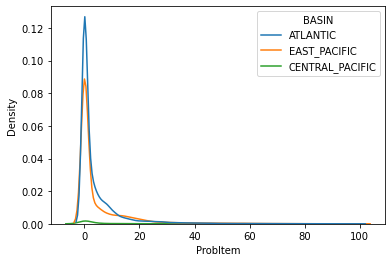

In [14]:
import seaborn as sns
etracks_test = etracks_valid_RI.copy()
etracks_test['ProbItem'] = etracks_test['ProbItem'].astype(int)
sns.kdeplot(data=etracks_test,x='ProbItem',hue='BASIN')

In [15]:
foo = etracks_test.where((etracks_test['RIstopTAU'].astype(int) <= 24)
                        & (etracks_test['Intensity Change'].astype(int) > 0)).dropna(how='all')

<AxesSubplot:xlabel='ProbItem', ylabel='Count'>

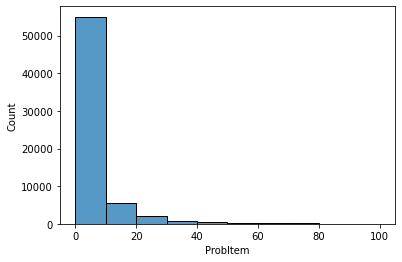

In [16]:
sns.histplot(data=foo,x='ProbItem',binwidth=10)

In [17]:
np.histogram(foo['ProbItem'],)

(array([55007,  5584,  2057,   812,   476,   282,   169,    82,    36,
           20]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

In [19]:
etracks_test.set_index(['BASIN','DATE','Tech'])#.xs(('EAST_PACIFIC','2020-07-22 06:00:00','RIOD'))

CYCLONE NO ProbFormat TAU   LAT   LON  ProbItem  \
BASIN    DATE       Tech                                                   
ATLANTIC 2021-08-15 EIOB         08         RI  12  360N  635W         0   
                    EIOB         08         RI  24  360N  635W         0   
                    EIOB         08         RI  24  360N  635W         0   
                    EIOB         08         RI  24  360N  635W         0   
                    EIOB         08         RI  24  360N  635W         0   
...                             ...        ...  ..   ...   ...       ...   
         2021-09-10 RIOL         13         RI  24  322N  761W         1   
                    RIOL         13         RI  24  322N  761W         0   
                    RIOL         13         RI  24  322N  761W         0   
                    RIOL         13         RI  36  322N  761W         0   
                    RIOL         13         RI  48  322N  761W         0   

                         Intensity Change   V Initials RIstartTAU RIstopTAU  
BASIN    DATE       Tech                                                     
ATLANTIC 2021-08-15 EIOB               20  45                   0        12  
                    EIOB               25  50                   0        24  
                    EIOB               30  55                   0        24  
                    EIOB               35  60                   0        24  
                    EIOB               40  65                   0        24  
...                                   ...  ..      ...        ...       ...  
         2021-09-10 RIOL               30  60                   0        24  
                    RIOL               35  65                   0        24  
                    RIOL               40  70                   0        24  
                    RIOL               45  75                   0        36  
                    RIOL               55  85                   0        48  

[102692 rows x 11 columns]

In [20]:
etracks_test[(etracks_test['ProbItem'] > 70) & (etracks_test['Intensity Change'].astype(int)==40)]

,BASIN,CYCLONE NO,DATE,ProbFormat,Tech,TAU,LAT,LON,ProbItem,Intensity Change,V,Initials,RIstartTAU,RIstopTAU
91936,EAST_PACIFIC,17,2021-10-23 06:00:00,RI,EIOD,24,137N,1013W,72,40,95,,0,24


In [ ]:
# etracks_